In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [33]:
df= pd.read_excel(r"C:\Users\sadaa\OneDrive\Desktop\walmart Retail Data.xlsx")
df.head()

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,-111.80,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,-342.91,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,-193.08,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,247.79,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,-1049.85,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  8399 non-null   object        
 1   Customer Age          7496 non-null   float64       
 2   Customer Name         8399 non-null   object        
 3   Customer Segment      8399 non-null   object        
 4   Discount              8399 non-null   float64       
 5   Number of Records     8399 non-null   int64         
 6   Order Date            8399 non-null   datetime64[ns]
 7   Order ID              8399 non-null   int64         
 8   Order Priority        8399 non-null   object        
 9   Order Quantity        8399 non-null   int64         
 10  Product Base Margin   8336 non-null   float64       
 11  Product Category      8399 non-null   object        
 12  Product Container     8399 non-null   object        
 13  Product Name      

In [37]:
print(df.isnull().sum())

City                      0
Customer Age            903
Customer Name             0
Customer Segment          0
Discount                  0
Number of Records         0
Order Date                0
Order ID                  0
Order Priority            0
Order Quantity            0
Product Base Margin      63
Product Category          0
Product Container         0
Product Name              0
Product Sub-Category      0
Profit                    0
Region                    0
Row ID                    0
Sales                     0
Ship Date                 0
Ship Mode                 0
Shipping Cost             0
State                     0
Unit Price                0
Zip Code                  0
dtype: int64


In [39]:
from sklearn.impute import SimpleImputer

In [40]:
numerical_features = ["Customer Age", "Product Base Margin"]

In [43]:
num_imputer=SimpleImputer(strategy='median')
df[numerical_features]=num_imputer.fit_transform(df[numerical_features])


In [45]:
df['Order Priority'].unique()

array(['High', 'Not Specified', 'Low', 'Critical', 'Medium'], dtype=object)

In [47]:
from sklearn.impute import SimpleImputer
import numpy as np

# Replace 'Not Specified' with NaN
df['Order Priority'] = df['Order Priority'].replace('Not Specified', np.nan)

# Create the imputer for categorical data (most frequent value)
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer and flatten the result
df['Order Priority'] = imputer.fit_transform(df[['Order Priority']]).ravel()

# Check for remaining missing values
print(df['Order Priority'].isnull().sum())

0


In [49]:
df['Order Priority'].unique()

array(['High', 'Low', 'Critical', 'Medium'], dtype=object)

In [51]:
df

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,53.0,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,-111.80,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,53.0,Matt Collister,Home Office,0.08,1,2012-01-01,13729,High,9,...,-342.91,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715
2,Napa,53.0,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,-193.08,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559
3,Montebello,53.0,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,247.79,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640
4,Napa,53.0,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,-1049.85,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Fairfield,95.0,Tony Molinari,Corporate,0.10,1,2015-12-30,50950,High,35,...,-15.07,West,7142,448.10,2015-12-30,Express Air,4.51,California,13.48,94533
8395,Harker Heights,95.0,Matt Hagelstein,Home Office,0.09,1,2015-12-30,25542,Low,37,...,-18.66,Central,3583,257.46,2015-12-30,Express Air,4.23,Texas,7.28,76543
8396,Riverview,95.0,Theresa Swint,Consumer,0.10,1,2015-12-30,45127,Medium,10,...,-1.29,South,6361,14.15,2015-12-30,Regular Air,0.70,Florida,1.48,33569
8397,Nicholasville,95.0,Maribeth Yedwab,Home Office,0.09,1,2015-12-30,49344,Low,1,...,-745.20,South,6916,803.33,2015-12-30,Regular Air,24.49,Kentucky,832.81,40356


In [53]:
print(df.isnull().sum())

City                    0
Customer Age            0
Customer Name           0
Customer Segment        0
Discount                0
Number of Records       0
Order Date              0
Order ID                0
Order Priority          0
Order Quantity          0
Product Base Margin     0
Product Category        0
Product Container       0
Product Name            0
Product Sub-Category    0
Profit                  0
Region                  0
Row ID                  0
Sales                   0
Ship Date               0
Ship Mode               0
Shipping Cost           0
State                   0
Unit Price              0
Zip Code                0
dtype: int64


In [55]:
#onehotencoding

In [57]:
df['Customer Segment'].unique()

array(['Small Business', 'Home Office', 'Corporate', 'Consumer'],
      dtype=object)

In [59]:
df['Product Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [61]:
df['Product Container'].unique()

array(['Small Box', 'Large Box', 'Jumbo Drum', 'Wrap Bag', 'Jumbo Box',
       'Medium Box', 'Small Pack'], dtype=object)

In [63]:
df['Product Sub-Category'].unique()

array(['Storage & Organization', 'Chairs & Chairmats', 'Paper',
       'Binders and Binder Accessories', 'Tables', 'Office Furnishings',
       'Pens & Art Supplies', 'Office Machines', 'Computer Peripherals',
       'Telephones and Communication', 'Bookcases', 'Copiers and Fax',
       'Labels', 'Appliances', 'Rubber Bands', 'Envelopes',
       'Scissors, Rulers and Trimmers'], dtype=object)

In [65]:
df['Region'].unique()

array(['East', 'West', 'Central', 'South'], dtype=object)

In [67]:
df['Ship Mode'].unique()

array(['Regular Air', 'Express Air', 'Delivery Truck'], dtype=object)

In [69]:
categorical_features = ["Ship Mode","Customer Segment", "Product Category", "Region", "Order Priority "]


In [71]:
from sklearn.preprocessing import OneHotEncoder

In [73]:
ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

In [75]:
ohe_transformed_df=ohe.fit_transform(df[['Ship Mode','Product Category','Region','Customer Segment']])

In [77]:
ohe_transformed_df

,Ship Mode_Delivery Truck,Ship Mode_Express Air,Ship Mode_Regular Air,Product Category_Furniture,Product Category_Office Supplies,Product Category_Technology,Region_Central,Region_East,Region_South,Region_West,Customer Segment_Consumer,Customer Segment_Corporate,Customer Segment_Home Office,Customer Segment_Small Business
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8395,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8396,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8397,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [79]:
df=pd.concat([df,ohe_transformed_df],axis=1).drop(columns=['Ship Mode','Product Category','Region','Customer Segment'])

In [81]:
df

,City,Customer Age,Customer Name,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,Product Base Margin,...,Product Category_Office Supplies,Product Category_Technology,Region_Central,Region_East,Region_South,Region_West,Customer Segment_Consumer,Customer Segment_Corporate,Customer Segment_Home Office,Customer Segment_Small Business
0,McKeesport,53.0,Jessica Myrick,0.10,1,2012-01-01,28774,High,32,0.68,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Bowie,53.0,Matt Collister,0.08,1,2012-01-01,13729,High,9,0.52,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Napa,53.0,Alan Schoenberger,0.00,1,2012-01-02,37537,Low,4,0.56,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Montebello,53.0,Elizabeth Moffitt,0.08,1,2012-01-02,44069,Critical,43,0.39,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,Napa,53.0,Alan Schoenberger,0.07,1,2012-01-02,37537,Low,43,0.69,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Fairfield,95.0,Tony Molinari,0.10,1,2015-12-30,50950,High,35,0.59,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8395,Harker Heights,95.0,Matt Hagelstein,0.09,1,2015-12-30,25542,Low,37,0.39,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8396,Riverview,95.0,Theresa Swint,0.10,1,2015-12-30,45127,Medium,10,0.37,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8397,Nicholasville,95.0,Maribeth Yedwab,0.09,1,2015-12-30,49344,Low,1,0.83,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [83]:
from sklearn.preprocessing import OrdinalEncoder

In [85]:
df['Order Priority'].unique()

array(['High', 'Low', 'Critical', 'Medium'], dtype=object)

In [87]:
size=['Low','Medium','High','Critical']

In [89]:
enc=OrdinalEncoder(categories=[size])

In [91]:
enc

OrdinalEncoder(categories=[['Low', 'Medium', 'High', 'Critical']])

In [93]:
df['Order Priority']=enc.fit_transform(df[['Order Priority']])

In [95]:
df

,City,Customer Age,Customer Name,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,Product Base Margin,...,Product Category_Office Supplies,Product Category_Technology,Region_Central,Region_East,Region_South,Region_West,Customer Segment_Consumer,Customer Segment_Corporate,Customer Segment_Home Office,Customer Segment_Small Business
0,McKeesport,53.0,Jessica Myrick,0.10,1,2012-01-01,28774,2.0,32,0.68,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Bowie,53.0,Matt Collister,0.08,1,2012-01-01,13729,2.0,9,0.52,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Napa,53.0,Alan Schoenberger,0.00,1,2012-01-02,37537,0.0,4,0.56,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Montebello,53.0,Elizabeth Moffitt,0.08,1,2012-01-02,44069,3.0,43,0.39,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,Napa,53.0,Alan Schoenberger,0.07,1,2012-01-02,37537,0.0,43,0.69,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Fairfield,95.0,Tony Molinari,0.10,1,2015-12-30,50950,2.0,35,0.59,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8395,Harker Heights,95.0,Matt Hagelstein,0.09,1,2015-12-30,25542,0.0,37,0.39,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8396,Riverview,95.0,Theresa Swint,0.10,1,2015-12-30,45127,1.0,10,0.37,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8397,Nicholasville,95.0,Maribeth Yedwab,0.09,1,2015-12-30,49344,0.0,1,0.83,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [99]:
columns_to_standardize = ['Customer Age','Profit', 'Sales', 'Unit Price']
scaler_standard = StandardScaler()

df[columns_to_standardize] = scaler_standard.fit_transform(df[columns_to_standardize])

# Normalization scales features to a range (default is [0, 1]).
columns_to_normalize = ['Shipping Cost']
scaler_minmax = MinMaxScaler()

df[columns_to_normalize] = scaler_minmax.fit_transform(df[columns_to_normalize])

# Display the scaled dataset with transformed columns
df_scaled = df.copy()
df_scaled[columns_to_standardize + columns_to_normalize].head()

,Customer Age,Profit,Sales,Unit Price,Shipping Cost
0,-0.152905,-0.244851,-0.445074,-0.287136,0.025572
1,-0.152905,-0.437993,-0.252005,0.022883,0.210119
2,-0.152905,-0.312778,-0.149747,0.697065,0.294143
3,-0.152905,0.055663,-0.323886,-0.255931,0.009011
4,-0.152905,-1.028792,0.643631,0.040070,0.271006


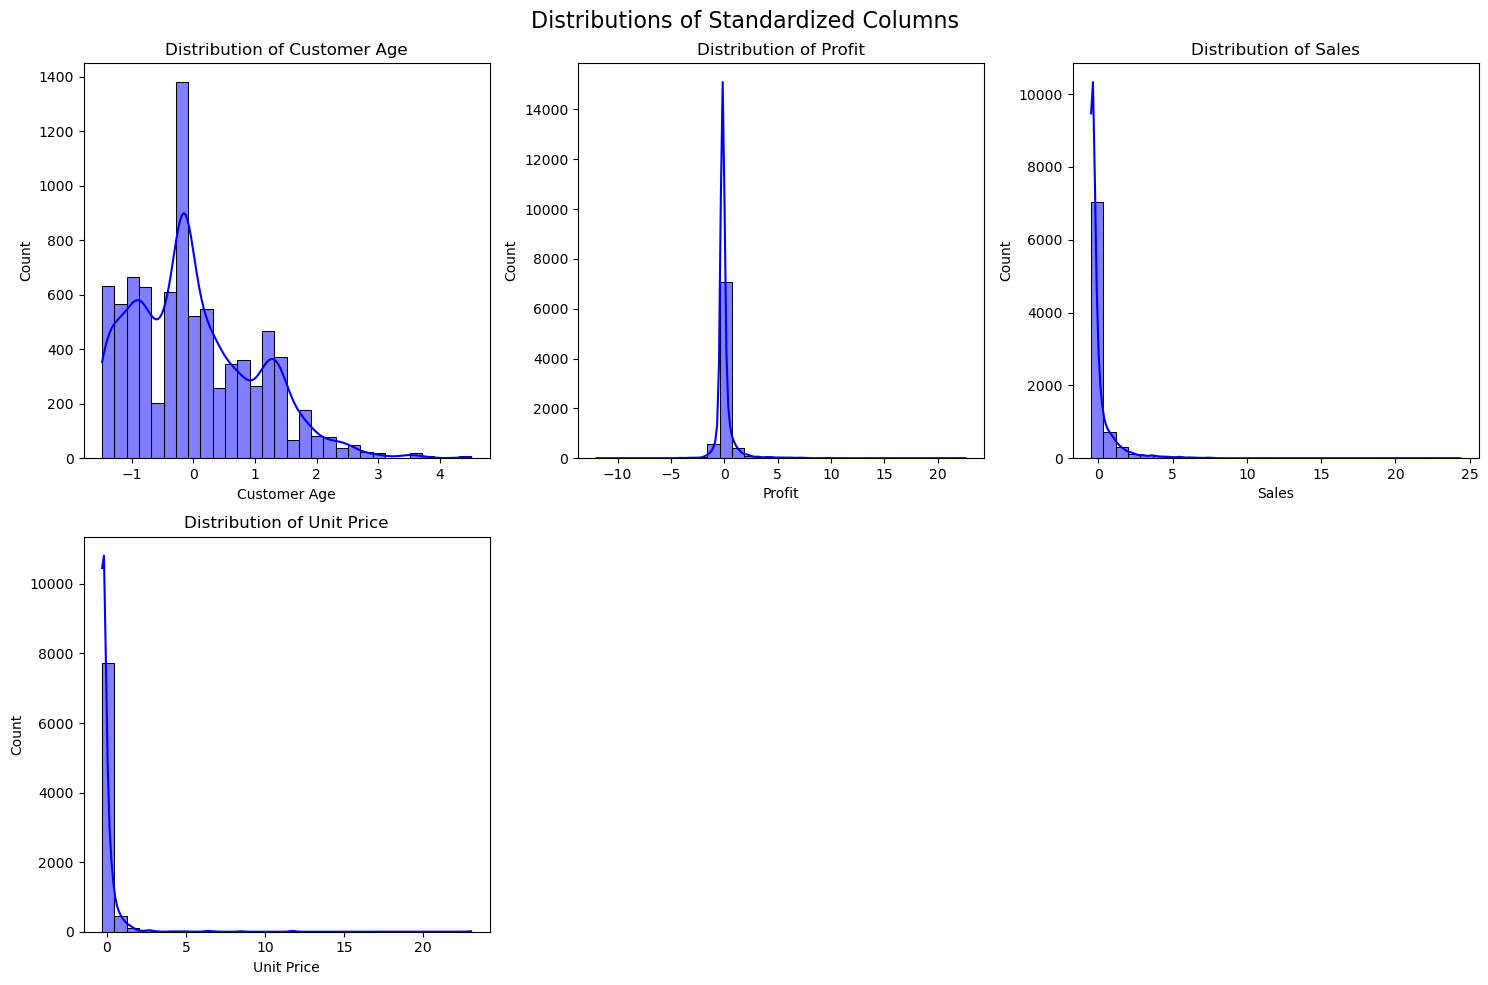

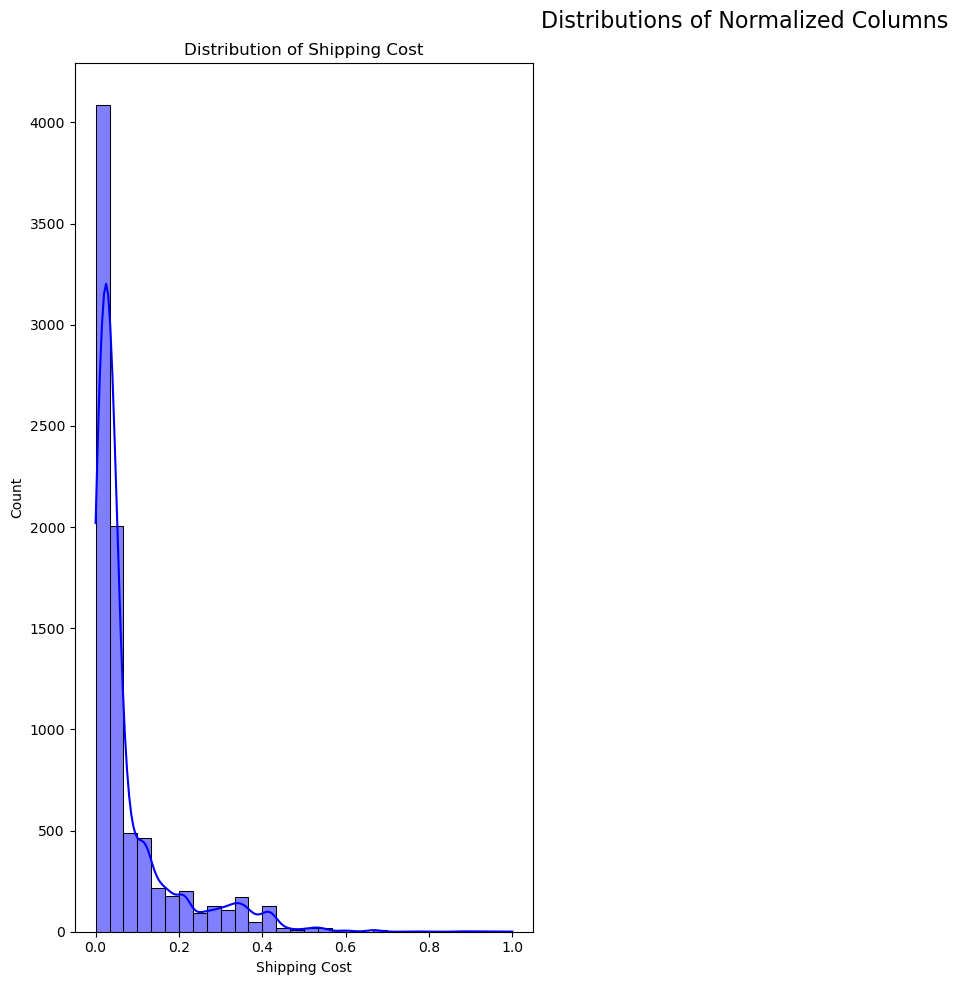

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Visualize Distributions of Transformed Columns
def plot_distributions(df, columns, title):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns, 1):
        plt.subplot(len(columns)//3 + 1, 3, i)
        sns.histplot(df[col], kde=True, bins=30, color='blue')
        plt.title(f"Distribution of {col}")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualize standardized columns
plot_distributions(df_scaled, columns_to_standardize, "Distributions of Standardized Columns")

# Visualize normalized columns
plot_distributions(df_scaled, columns_to_normalize, "Distributions of Normalized Columns")


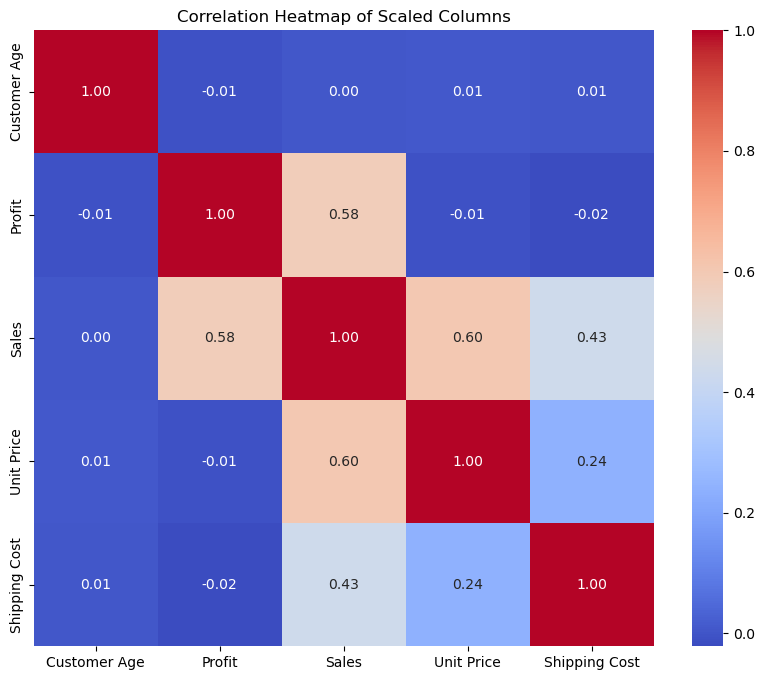

In [103]:
# Step 2: Correlation Heatmap for Standardized Columns
plt.figure(figsize=(10, 8))
corr_matrix = df_scaled[columns_to_standardize + columns_to_normalize].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Scaled Columns")
plt.show()

In [105]:
df


,City,Customer Age,Customer Name,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,Product Base Margin,...,Product Category_Office Supplies,Product Category_Technology,Region_Central,Region_East,Region_South,Region_West,Customer Segment_Consumer,Customer Segment_Corporate,Customer Segment_Home Office,Customer Segment_Small Business
0,McKeesport,-0.152905,Jessica Myrick,0.10,1,2012-01-01,28774,2.0,32,0.68,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Bowie,-0.152905,Matt Collister,0.08,1,2012-01-01,13729,2.0,9,0.52,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Napa,-0.152905,Alan Schoenberger,0.00,1,2012-01-02,37537,0.0,4,0.56,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Montebello,-0.152905,Elizabeth Moffitt,0.08,1,2012-01-02,44069,3.0,43,0.39,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,Napa,-0.152905,Alan Schoenberger,0.07,1,2012-01-02,37537,0.0,43,0.69,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Fairfield,4.511042,Tony Molinari,0.10,1,2015-12-30,50950,2.0,35,0.59,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8395,Harker Heights,4.511042,Matt Hagelstein,0.09,1,2015-12-30,25542,0.0,37,0.39,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8396,Riverview,4.511042,Theresa Swint,0.10,1,2015-12-30,45127,1.0,10,0.37,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8397,Nicholasville,4.511042,Maribeth Yedwab,0.09,1,2015-12-30,49344,0.0,1,0.83,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
